# **Recycle or Compost?** 
## MSBC 5190 Group Project

#### Team Members: Prafulla Adasumalli, Danielle Allen, Elena Heiner, Morgan Likens
##### April 28th, 2022


## **Imports**

In [ ]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt  

## **Data Import**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip ./DATASET.zip
#!unzip /content/drive/MyDrive/DATASET.zip

In [ ]:
data_dir = './DATASET/'

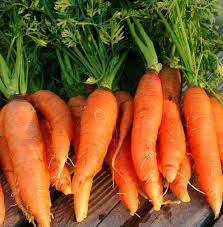

In [ ]:
from PIL import Image #show one example of image
Image.open("/content/DATASET/TEST/O/O_12568.jpg")

### Data Split

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Instantiate three image generator classes:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

valid_datagen = ImageDataGenerator(
   rescale=1.0/255,
   data_format='channels_last')

test_datagen = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [ ]:
batch_size=32
train_generator = train_datagen.flow_from_directory(
    directory= data_dir + 'TRAIN',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator = valid_datagen.flow_from_directory(
    directory=data_dir + 'VALIDATE',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',    
    batch_size=batch_size,
    shuffle=True,
    seed=42)

test_generator = test_datagen.flow_from_directory(
    directory= data_dir +'TEST',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

Found 17600 images belonging to 2 classes.
Found 4964 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## **Computer Vision Models**

### **Model 1 - From Scratch**

##### Model 1

In [ ]:
# baseline 
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),padding='same', strides=(1, 1), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3),padding='same',  strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3),padding='same',  strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

Epoch 1/10
550/550 [==============================] - 55s 82ms/step - loss: 0.4719 - accuracy: 0.8041 - val_loss: 0.4477 - val_accuracy: 0.8235
Epoch 2/10
550/550 [==============================] - 45s 82ms/step - loss: 0.3700 - accuracy: 0.8446 - val_loss: 0.3990 - val_accuracy: 0.8427
Epoch 3/10
550/550 [==============================] - 46s 83ms/step - loss: 0.3280 - accuracy: 0.8651 - val_loss: 0.3980 - val_accuracy: 0.8419
Epoch 4/10
550/550 [==============================] - 43s 79ms/step - loss: 0.2863 - accuracy: 0.8843 - val_loss: 0.4481 - val_accuracy: 0.8386
Epoch 5/10
550/550 [==============================] - 43s 78ms/step - loss: 0.2506 - accuracy: 0.8995 - val_loss: 0.6163 - val_accuracy: 0.8026
Epoch 6/10
550/550 [==============================] - 42s 77ms/step - loss: 0.2005 - accuracy: 0.9205 - val_loss: 0.5804 - val_accuracy: 0.8320
Epoch 7/10
550/550 [==============================] - 43s 78ms/step - loss: 0.1624 - accuracy: 0.9365 - val_loss: 0.5507 - val_accuracy:

##### Results

In [ ]:
model.evaluate(test_generator)

79/79 [==============================] - 5s 60ms/step - loss: 0.5933 - accuracy: 0.8675


[0.5932667255401611, 0.8674890398979187]

In [ ]:
_, accuracy = model.evaluate(test_generator)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 5s 60ms/step - loss: 0.5933 - accuracy: 0.8675
Accuracy: 86.75


In [ ]:
print(np.mean(history.history['accuracy']))

0.9029602229595184


In [ ]:
def plot_learning_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

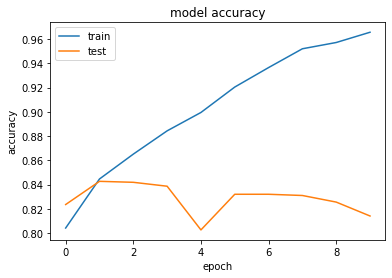

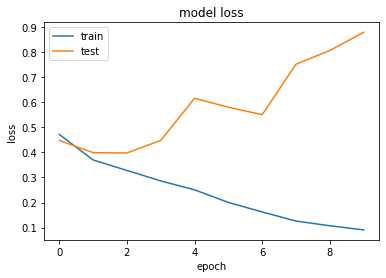

In [ ]:
plot_learning_curve(history)

### **Model 2 - Transfer Learning VGG19**

##### Model 2

In [ ]:
# transfer learning 
from keras.applications.vgg19 import VGG19 

vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
model_t = Sequential()
model_t.add(vgg19)

model_t.add(Flatten(name='flattened'))
model_t.add(Dropout(0.5, name='dropout'))
model_t.add(Dense(2, activation='softmax', name='predictions'))

In [ ]:
model_t.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flattened (Flatten)         (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 predictions (Dense)         (None, 2)                 50178     
                                                                 
Total params: 20,074,562
Trainable params: 50,178
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model_t.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_t = model_t.fit(train_generator, steps_per_epoch=15, 
                    epochs=16, validation_data=valid_generator, validation_steps=15)

Epoch 1/16
15/15 [==============================] - 6s 376ms/step - loss: 0.2942 - accuracy: 0.8917 - val_loss: 0.7516 - val_accuracy: 0.7500
Epoch 2/16
15/15 [==============================] - 5s 360ms/step - loss: 0.3846 - accuracy: 0.8813 - val_loss: 0.9051 - val_accuracy: 0.6875
Epoch 3/16
15/15 [==============================] - 5s 360ms/step - loss: 0.3864 - accuracy: 0.8542 - val_loss: 0.7119 - val_accuracy: 0.7500
Epoch 4/16
15/15 [==============================] - 5s 362ms/step - loss: 0.3961 - accuracy: 0.8792 - val_loss: 0.8537 - val_accuracy: 0.7667
Epoch 5/16
15/15 [==============================] - 5s 363ms/step - loss: 0.3567 - accuracy: 0.8854 - val_loss: 0.6000 - val_accuracy: 0.7792
Epoch 6/16
15/15 [==============================] - 5s 364ms/step - loss: 0.3277 - accuracy: 0.8750 - val_loss: 0.6473 - val_accuracy: 0.7896
Epoch 7/16
15/15 [==============================] - 5s 364ms/step - loss: 0.3964 - accuracy: 0.8771 - val_loss: 0.7202 - val_accuracy: 0.7604
Epoch 

##### Results

In [ ]:
model_t.evaluate(test_generator)

79/79 [==============================] - 14s 173ms/step - loss: 0.4345 - accuracy: 0.8599


[0.43445971608161926, 0.8599283695220947]

In [ ]:
_, accuracy = model_t.evaluate(test_generator)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 14s 172ms/step - loss: 0.4345 - accuracy: 0.8599
Accuracy: 85.99


In [ ]:
print(np.mean(history_t.history['accuracy']))

0.8768229186534882


In [ ]:
def plot_learning_curve(history_t):
  plt.plot(history_t.history['accuracy'])
  plt.plot(history_t.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history_t.history['loss'])
  plt.plot(history_t.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

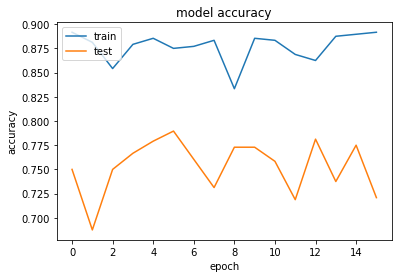

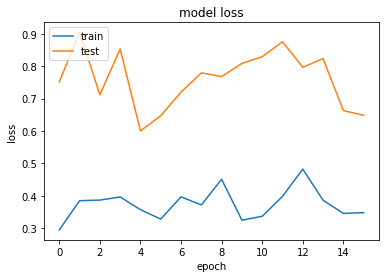

In [ ]:
plot_learning_curve(history_t)

### Model 3 - Transfer Learning 

##### Model 6



###### *Data Changes*

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Instantiate three image generator classes:
train_datagen_final = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last',
     rotation_range=30,
     horizontal_flip=True)

valid_datagen_final = ImageDataGenerator(
   rescale=1.0/255,
   data_format='channels_last')

test_datagen_final = ImageDataGenerator(
    rescale=1.0/255,
    data_format='channels_last')

In [ ]:
batch_size=32
train_generator_final = train_datagen_final.flow_from_directory(
    directory= data_dir + 'TRAIN',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
    seed=42)

valid_generator_final = valid_datagen_final.flow_from_directory(
    directory=data_dir + 'VALIDATE',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',    
    batch_size=batch_size,
    shuffle=False,
    seed=42)

test_generator_final = test_datagen_final.flow_from_directory(
    directory= data_dir +'TEST',
    target_size=(224, 224),
    classes=['O','R'],
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
    seed=42)

Found 17600 images belonging to 2 classes.
Found 4964 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


###### *Model Changes*

In [ ]:
from keras.applications.vgg19 import VGG19 

vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
model_b2 = Sequential()
model_b2.add(vgg19)

model_b2.add(Flatten(name='flattened'))
model_b2.add(Dropout(0.4, name='dropout'))
model_b2.add(Dense(2, activation ='softmax'))

In [ ]:
model_b2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history_b2 = model_b2.fit(train_generator_final, 
                          epochs = 5, 
                          verbose = 1,
                          validation_data = valid_generator_final,
                          shuffle = True)

Epoch 1/5
550/550 [==============================] - 214s 387ms/step - loss: 0.4143 - accuracy: 0.8519 - val_loss: 1.0342 - val_accuracy: 0.7405
Epoch 2/5
550/550 [==============================] - 215s 390ms/step - loss: 0.3771 - accuracy: 0.8743 - val_loss: 0.8637 - val_accuracy: 0.7474
Epoch 3/5
550/550 [==============================] - 213s 387ms/step - loss: 0.3869 - accuracy: 0.8745 - val_loss: 0.8079 - val_accuracy: 0.7544
Epoch 4/5
550/550 [==============================] - 213s 387ms/step - loss: 0.4043 - accuracy: 0.8784 - val_loss: 0.8293 - val_accuracy: 0.7411
Epoch 5/5
550/550 [==============================] - 211s 383ms/step - loss: 0.3993 - accuracy: 0.8823 - val_loss: 1.0742 - val_accuracy: 0.7796


In [ ]:
_, accuracy = model_b2.evaluate(test_generator_final)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 8s 95ms/step - loss: 0.6376 - accuracy: 0.8647
Accuracy: 86.47


In [ ]:
for layer in vgg19.layers:
    layer.trainable = True

In [ ]:
from tensorflow import keras
model_b2.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
train_generator_final.reset()
valid_generator_final.reset()

In [ ]:
history_b2 = model_b2.fit(train_generator_final, 
                          epochs = 10,
                          verbose = 1,
                          validation_data = valid_generator_final,
                          shuffle = True)

Epoch 1/10
550/550 [==============================] - 249s 451ms/step - loss: 0.2469 - accuracy: 0.9126 - val_loss: 0.4612 - val_accuracy: 0.8402
Epoch 2/10
550/550 [==============================] - 247s 449ms/step - loss: 0.1674 - accuracy: 0.9408 - val_loss: 0.4217 - val_accuracy: 0.8533
Epoch 3/10
550/550 [==============================] - 247s 449ms/step - loss: 0.1377 - accuracy: 0.9499 - val_loss: 0.4322 - val_accuracy: 0.8729
Epoch 4/10
550/550 [==============================] - 247s 449ms/step - loss: 0.1118 - accuracy: 0.9588 - val_loss: 0.4566 - val_accuracy: 0.8795
Epoch 5/10
550/550 [==============================] - 247s 449ms/step - loss: 0.1014 - accuracy: 0.9630 - val_loss: 0.4699 - val_accuracy: 0.8541
Epoch 6/10
550/550 [==============================] - 248s 450ms/step - loss: 0.0837 - accuracy: 0.9677 - val_loss: 0.6076 - val_accuracy: 0.8640
Epoch 7/10
550/550 [==============================] - 247s 449ms/step - loss: 0.0780 - accuracy: 0.9694 - val_loss: 0.5761 -

##### Results

In [ ]:
test_generator_final.reset()

In [ ]:
model_b2.evaluate(test_generator_final)

79/79 [==============================] - 8s 95ms/step - loss: 0.3773 - accuracy: 0.8997


[0.3772757947444916, 0.8997214436531067]

In [ ]:
_, accuracy = model_b2.evaluate(test_generator_final)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 8s 95ms/step - loss: 0.3773 - accuracy: 0.8997
Accuracy: 89.97


In [ ]:
print(np.mean(history_b2.history['accuracy']))

0.9597613632678985


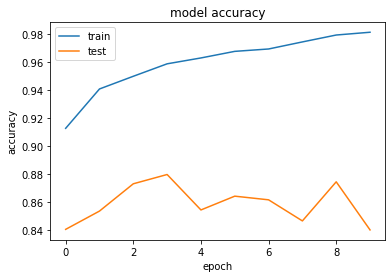

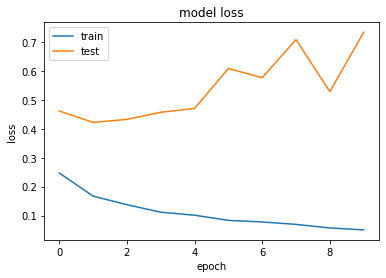

In [ ]:
plot_learning_curve(history_b2)

### Model 4 - Transfer Learning + Freeze Layers

##### Model 4

In [ ]:
from keras.applications.vgg19 import VGG19 
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(224,224,3),
              pooling=None)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import layers, regularizers

model_final2 = Sequential()
model_final2.add(vgg19)

model_final2.add(BatchNormalization())
model_final2.add(Dropout(0.5, name = 'dropout1'))
model_final2.add(Dense(64, kernel_regularizer=regularizers.l2(0.01)))
model_final2.add(Flatten(name='flattened'))
model_final2.add(Dropout(0.5, name = 'dropout2'))
model_final2.add(Dense(2, activation = 'softmax', name = 'predictions', kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
model_final2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 512)        2048      
 ormalization)                                                   
                                                                 
 dropout1 (Dropout)          (None, 7, 7, 512)         0         
                                                                 
 dense (Dense)               (None, 7, 7, 64)          32832     
                                                                 
 flattened (Flatten)         (None, 3136)              0         
                                                                 
 dropout2 (Dropout)          (None, 3136)              0         
                                                      

In [ ]:
model_final2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history_final2 = model_final2.fit(train_generator_final, 
                                  verbose = 1,
                                  epochs = 5, 
                                  validation_data = valid_generator_final)

Epoch 1/5
550/550 [==============================] - 209s 378ms/step - loss: 1.4873 - accuracy: 0.8210 - val_loss: 1.3802 - val_accuracy: 0.7295
Epoch 2/5
550/550 [==============================] - 209s 379ms/step - loss: 0.7518 - accuracy: 0.8629 - val_loss: 0.9179 - val_accuracy: 0.7542
Epoch 3/5
550/550 [==============================] - 207s 376ms/step - loss: 0.5040 - accuracy: 0.8760 - val_loss: 0.8000 - val_accuracy: 0.7506
Epoch 4/5
550/550 [==============================] - 207s 377ms/step - loss: 0.4267 - accuracy: 0.8783 - val_loss: 0.6681 - val_accuracy: 0.7399
Epoch 5/5
550/550 [==============================] - 207s 376ms/step - loss: 0.4134 - accuracy: 0.8789 - val_loss: 0.7163 - val_accuracy: 0.7623


In [ ]:
_, accuracy = model_final2.evaluate(test_generator_final)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 6s 81ms/step - loss: 0.4299 - accuracy: 0.8758
Accuracy: 87.58


In [ ]:
for layer in vgg19.layers:
    layer.trainable = True

In [ ]:
from tensorflow import keras
model_final2.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
                 loss = 'categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
train_generator_final.reset()
valid_generator_final.reset()

In [ ]:
history_final2 = model_final2.fit(train_generator_final, 
                          epochs = 10,
                          verbose = 1,
                          validation_data = valid_generator_final,
                          shuffle = True)

Epoch 1/10
550/550 [==============================] - 245s 444ms/step - loss: 0.3152 - accuracy: 0.9177 - val_loss: 0.6966 - val_accuracy: 0.8179
Epoch 2/10
550/550 [==============================] - 244s 442ms/step - loss: 0.2581 - accuracy: 0.9422 - val_loss: 0.4658 - val_accuracy: 0.8660
Epoch 3/10
550/550 [==============================] - 244s 443ms/step - loss: 0.2317 - accuracy: 0.9495 - val_loss: 0.5577 - val_accuracy: 0.8638
Epoch 4/10
550/550 [==============================] - 244s 443ms/step - loss: 0.2138 - accuracy: 0.9563 - val_loss: 0.4655 - val_accuracy: 0.8803
Epoch 5/10
550/550 [==============================] - 243s 442ms/step - loss: 0.1946 - accuracy: 0.9612 - val_loss: 0.5551 - val_accuracy: 0.8548
Epoch 6/10
550/550 [==============================] - 244s 443ms/step - loss: 0.1821 - accuracy: 0.9657 - val_loss: 0.6418 - val_accuracy: 0.8344
Epoch 7/10
550/550 [==============================] - 250s 454ms/step - loss: 0.1711 - accuracy: 0.9690 - val_loss: 0.5703 -

##### Results

In [ ]:
test_generator_final.reset()

In [ ]:
model_final2.evaluate(test_generator_final)

79/79 [==============================] - 6s 80ms/step - loss: 0.3677 - accuracy: 0.9160


[0.36770176887512207, 0.9160366058349609]

In [ ]:
_, accuracy = model_final2.evaluate(test_generator_final)
print('Accuracy: %.2f' % (accuracy*100))

79/79 [==============================] - 6s 80ms/step - loss: 0.3677 - accuracy: 0.9160
Accuracy: 91.60


In [ ]:
print(np.mean(history_final2.history['accuracy']))

0.959306824207306


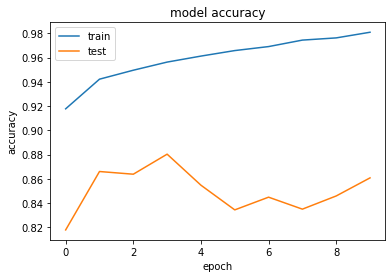

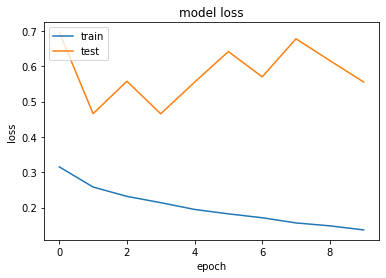

In [ ]:
plot_learning_curve(history_final2)